In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [2]:
def mean_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)
    return cv2.filter2D(image, -1, kernel)

def display_mean_filtering(image):
    sizes = [3, 7, 11]
    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title("Original")
    
    for i, k in enumerate(sizes):
        filtered = mean_filter(image, k)
        axs[i+1].imshow(filtered, cmap='gray')
        axs[i+1].set_title(f"Mean k={k}")
    plt.tight_layout()
    plt.show()


In [3]:
def gaussian_filter(image, kernel_size, sigma):
    k = cv2.getGaussianKernel(kernel_size, sigma)
    kernel = k @ k.T
    return cv2.filter2D(image, -1, kernel)

def display_gaussian_grid(image):
    kernel_sizes = [3, 7, 11]
    sigmas = [0.5, 1.5, 3.0]
    fig, axs = plt.subplots(3, 3, figsize=(12, 12))
    
    for i, k in enumerate(kernel_sizes):
        for j, s in enumerate(sigmas):
            filtered = gaussian_filter(image, k, s)
            axs[i, j].imshow(filtered, cmap='gray')
            axs[i, j].set_title(f"k={k}, σ={s}")
            axs[i, j].axis('off')
    plt.tight_layout()
    plt.show()


In [8]:
def compare_filters(image, k=7, sigma=1.5):
    mean_img = mean_filter(image, k)
    gauss_img = gaussian_filter(image, k, sigma)
    
    plt.figure(figsize=(12, 4))
    titles = ["Original", "Mean Filter", "Gaussian Filter"]
    images = [image, mean_img, gauss_img]
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()


In [ ]:
# Load grayscale image
img1 = cv2.imread('../images/q1/gaussian.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('../images/q1/meanfilter.jpeg', cv2.IMREAD_GRAYSCALE)

# Part (a)
display_mean_filtering(img2)
display_gaussian_grid(img1)
compare_filters(img1)  
compare_filters(img2) 

In [10]:
def prewitt_filter(image):
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    gx = convolve2d(image, kernelx, mode='same', boundary='symm')
    gy = convolve2d(image, kernely, mode='same', boundary='symm')
    return np.sqrt(gx**2 + gy**2)

def sobel_filter(image):
    gx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    gy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    return np.sqrt(gx**2 + gy**2)

def laplacian_filter(image):
    return cv2.Laplacian(image, cv2.CV_64F)

def display_edge_detection(image):
    prewitt = prewitt_filter(image)
    sobel = sobel_filter(image)
    laplacian = laplacian_filter(image)

    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    titles = ["Original", "Prewitt", "Sobel", "Laplacian"]
    images = [image, prewitt, sobel, laplacian]

    for i in range(4):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(titles[i])
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()


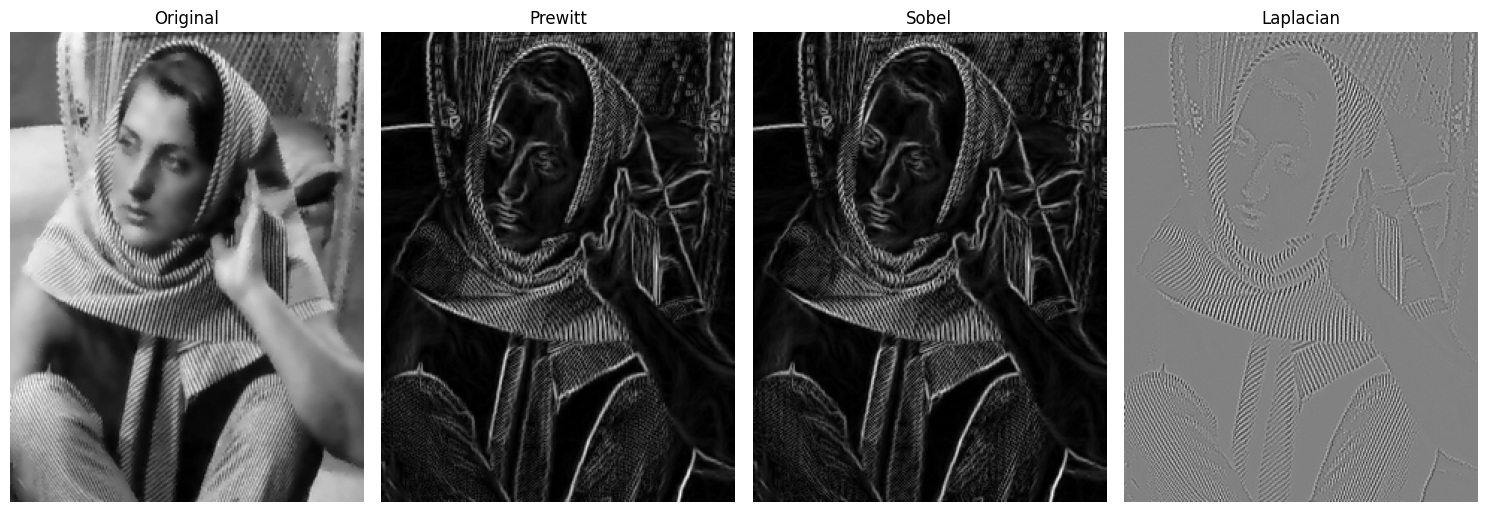

In [ ]:
# Load grayscale image
img1 = cv2.imread('../images/q1/gaussian.png', cv2.IMREAD_GRAYSCALE)

# Part (b)
display_edge_detection(img1)

In [ ]:
def laplacian_unsharp(image):
    lap = laplacian_filter(image)
    return np.clip(image + lap, 0, 255).astype(np.uint8)

def highboost_filter(image, a, ksize=5, sigma=1.0):
    blurred = gaussian_filter(image, ksize, sigma)
    mask = image - blurred
    return np.clip(image + a * mask, 0, 255).astype(np.uint8)

def display_sharpening(image):
    unsharp = laplacian_unsharp(image)
    boost_vals = [1.5, 2.5, 5.0]
    boosted = [highboost_filter(image, a) for a in boost_vals]
    
    fig, axs = plt.subplots(1, 5, figsize=(20, 5))
    titles = ["Original", "Unsharp"] + [f"Highboost a={a}" for a in boost_vals]
    images = [image, unsharp] + boosted

    for i in range(5):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(titles[i])
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()


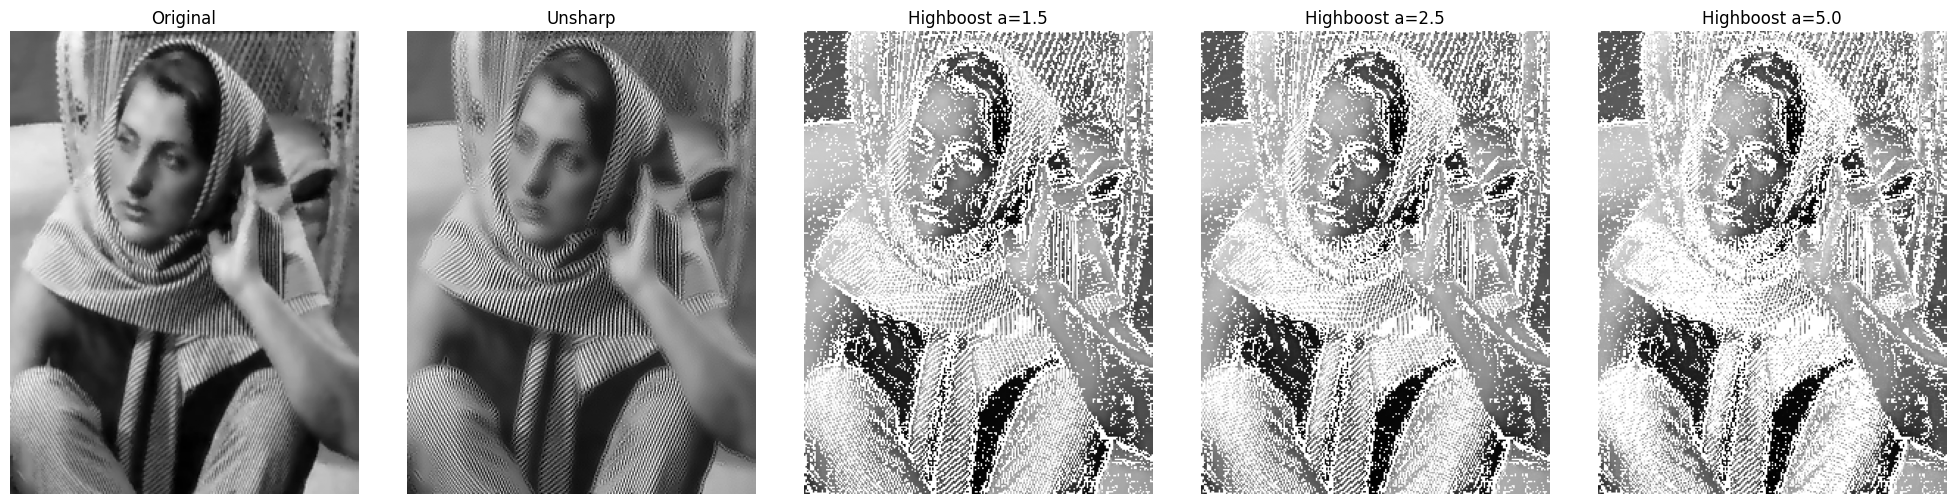

In [24]:
# Load grayscale image
img1 = cv2.imread('../images/q1/gaussian.png', cv2.IMREAD_GRAYSCALE)

# Part (c)
display_sharpening(img1)
